# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 문제 해결용
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:\Windows\Fonts\H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

# 1. Data

In [3]:
rg3 = pd.read_csv("data/processed/labeled_data_KAMP_rg3.csv", parse_dates=True)

In [4]:
rg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                1256 non-null   object 
 1   Injection_Time            1256 non-null   float64
 2   Filling_Time              1256 non-null   float64
 3   Plasticizing_Time         1256 non-null   float64
 4   Cycle_Time                1256 non-null   float64
 5   Clamp_Close_Time          1256 non-null   float64
 6   Cushion_Position          1256 non-null   float64
 7   Switch_Over_Position      1256 non-null   float64
 8   Plasticizing_Position     1256 non-null   float64
 9   Max_Injection_Speed       1256 non-null   float64
 10  Max_Screw_RPM             1256 non-null   float64
 11  Average_Screw_RPM         1256 non-null   float64
 12  Max_Injection_Pressure    1256 non-null   float64
 13  Max_Switch_Over_Pressure  1256 non-null   float64
 14  Max_Back

# 2. EDA

In [5]:
# "PassOrFail" 변수 변환
rg3["PassOrFail"] = rg3["PassOrFail"].replace("Y", 0).replace("N", 1)

In [6]:
# 변수별 통계량 확인
rg3.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,...,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,0.025478,1.060804,0.936561,12.933662,61.771775,6.801975,654.253140,2.086975,53.584443,128.164889,...,60.942834,285.952309,285.198408,285.005016,275.360431,265.009077,234.973408,65.513296,22.566481,23.824363
std,0.157634,0.003467,0.005627,0.064924,0.040249,0.007463,0.013271,36.937055,0.015085,0.262536,...,0.540794,0.425046,0.409545,0.328609,0.678517,0.316072,0.204242,1.055016,0.683102,0.807532
min,0.000000,1.050000,0.930000,12.800000,61.709999,6.790000,654.210022,0.000000,53.549999,126.800003,...,59.799999,284.600006,284.299988,284.200012,273.799988,263.600006,234.399994,62.200001,21.200001,22.100000
25%,0.000000,1.060000,0.930000,12.890000,61.759998,6.800000,654.239990,0.000000,53.570000,128.100006,...,60.599998,285.700012,284.899994,284.799988,274.700012,264.799988,234.800003,64.900002,22.000000,23.100000
50%,0.000000,1.060000,0.940000,12.920000,61.779999,6.800000,654.250000,0.000000,53.580002,128.199997,...,60.900002,286.000000,285.200012,285.000000,275.399994,265.000000,235.000000,65.599998,22.700001,23.799999
75%,0.000000,1.060000,0.940000,12.960000,61.779999,6.810000,654.260010,0.000000,53.590000,128.300003,...,61.200001,286.200012,285.500000,285.100006,275.899994,265.200012,235.100006,66.300003,23.200001,24.700001
max,1.000000,1.080000,0.960000,13.190000,62.200001,6.810000,654.289978,655.309998,53.669998,128.500000,...,64.000000,287.100006,286.500000,285.799988,276.799988,266.399994,235.500000,67.699997,23.700001,25.299999


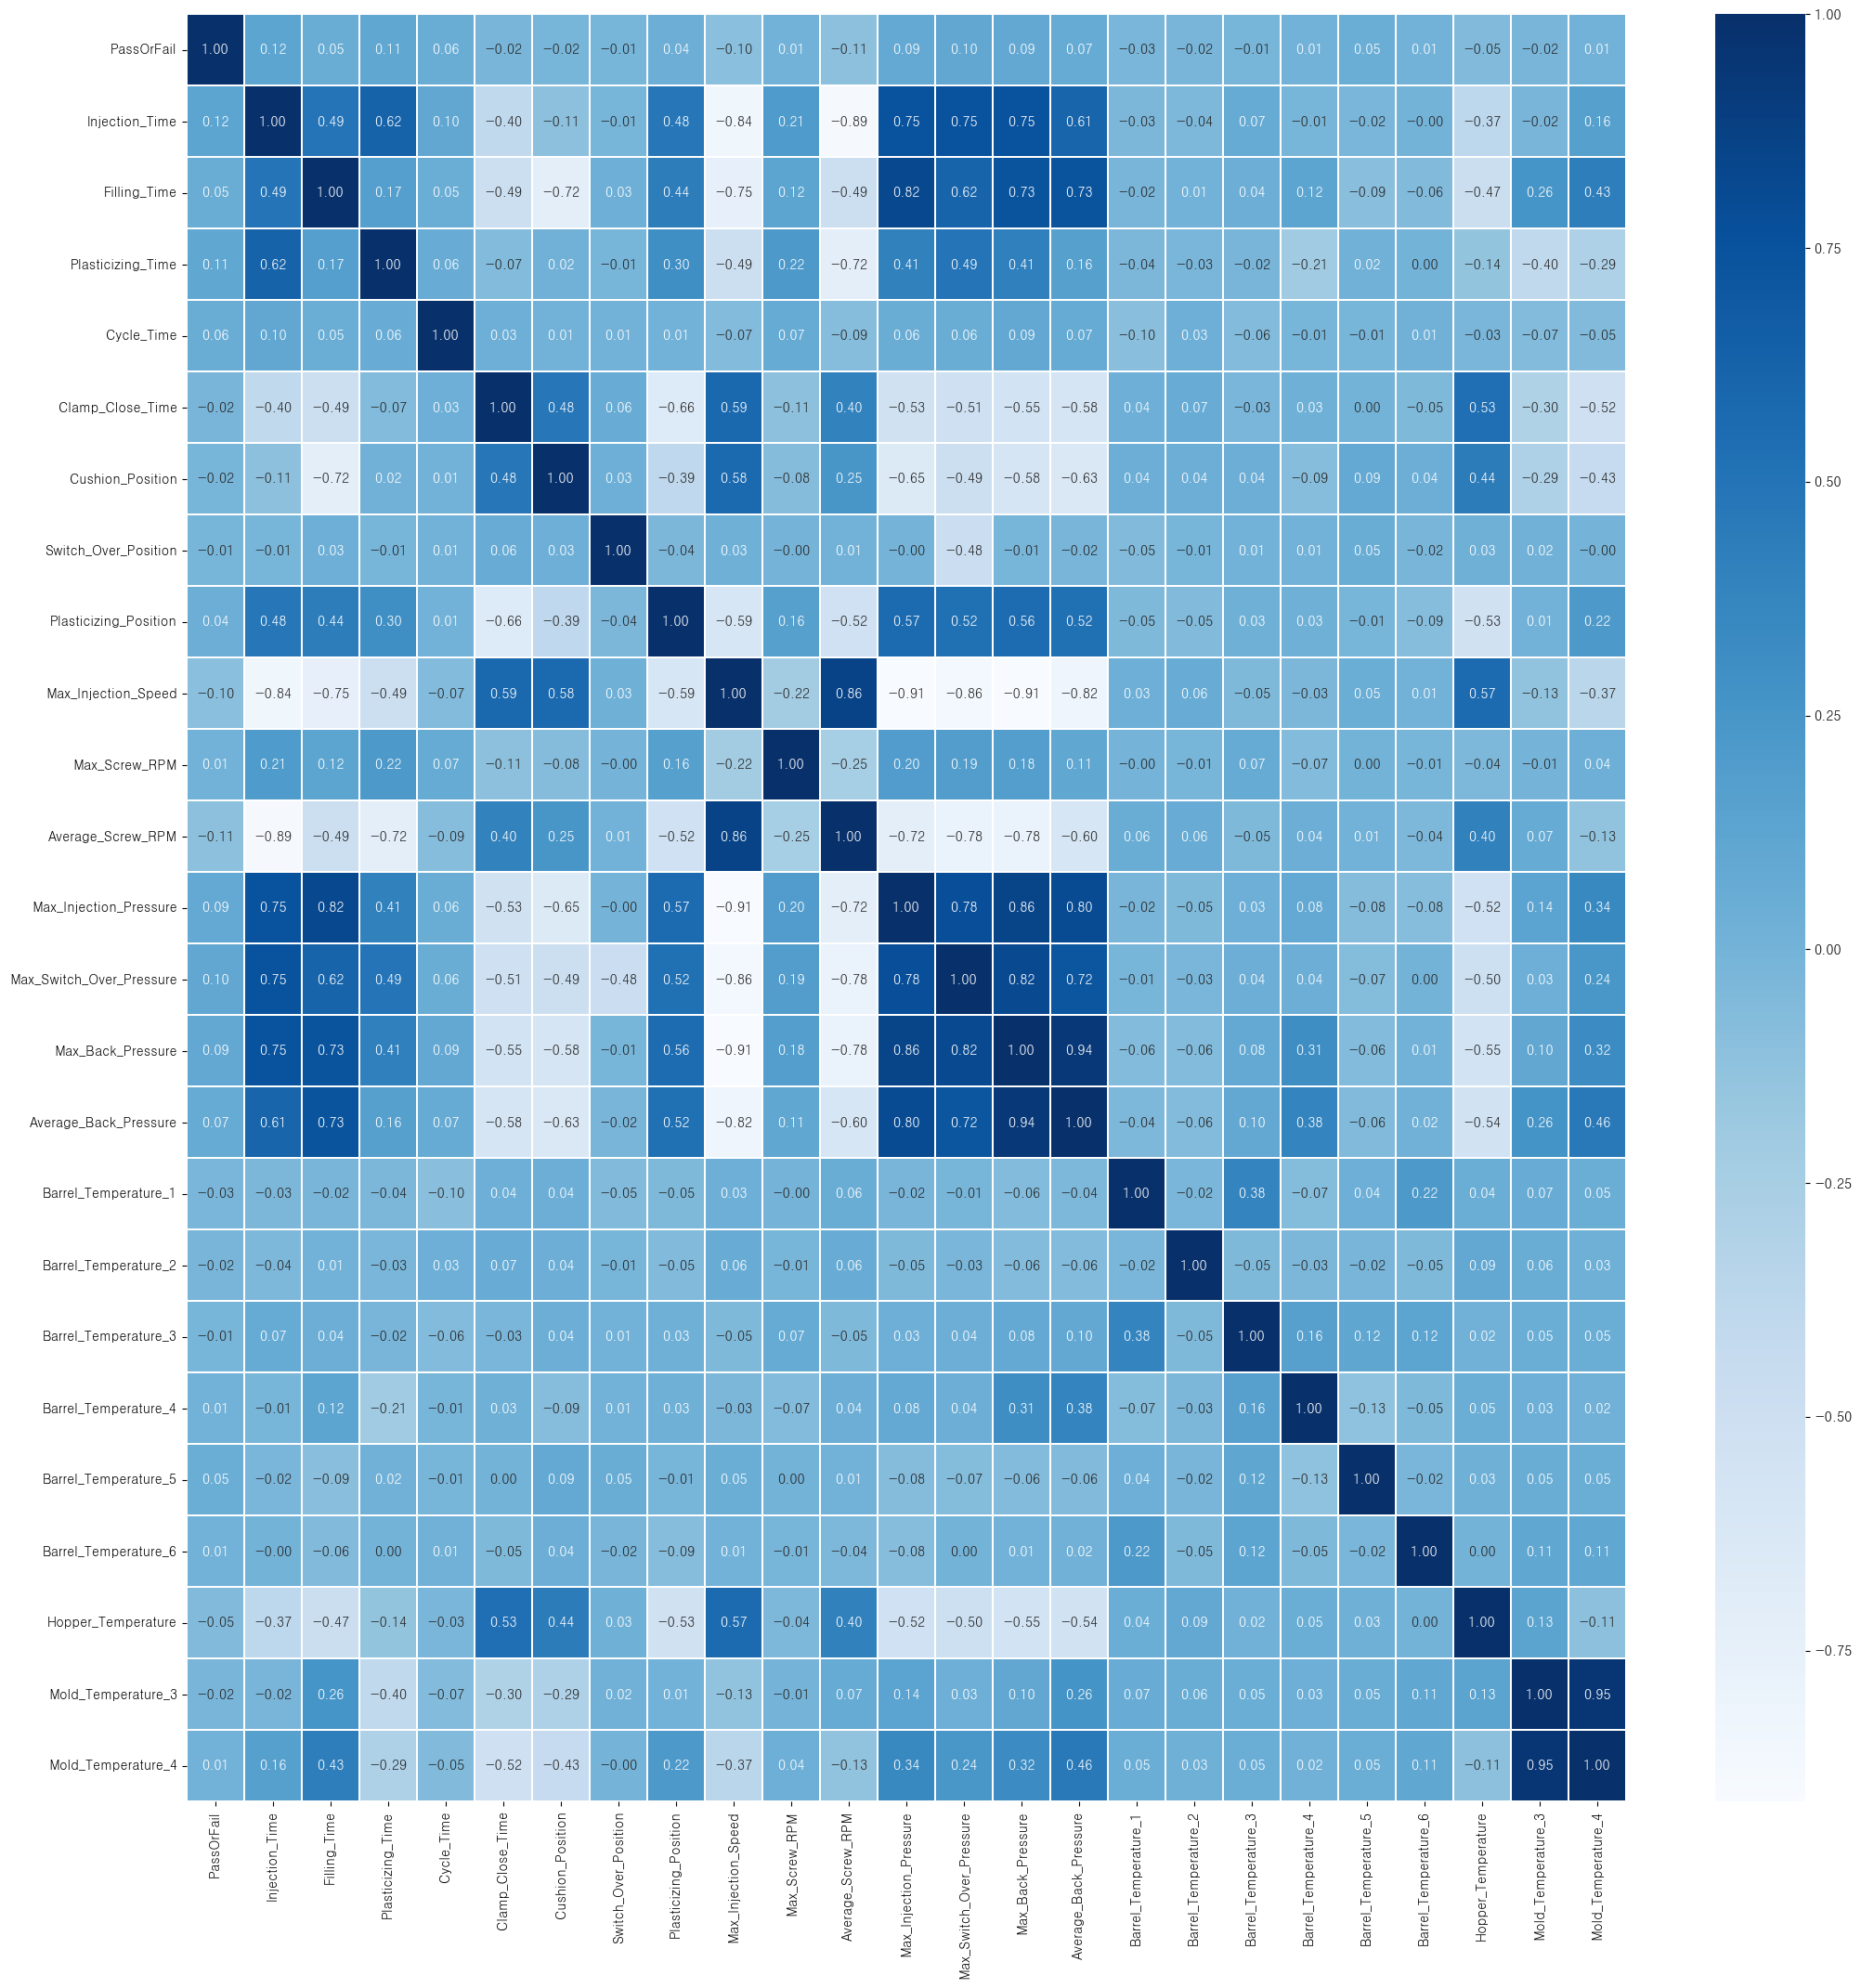

In [7]:
# 상관 관계 확인
plt.figure(figsize=(25, 25))
sns.heatmap(data=rg3.corr(), linewidths=0.1, annot=True, fmt=".2f", cmap="Blues");

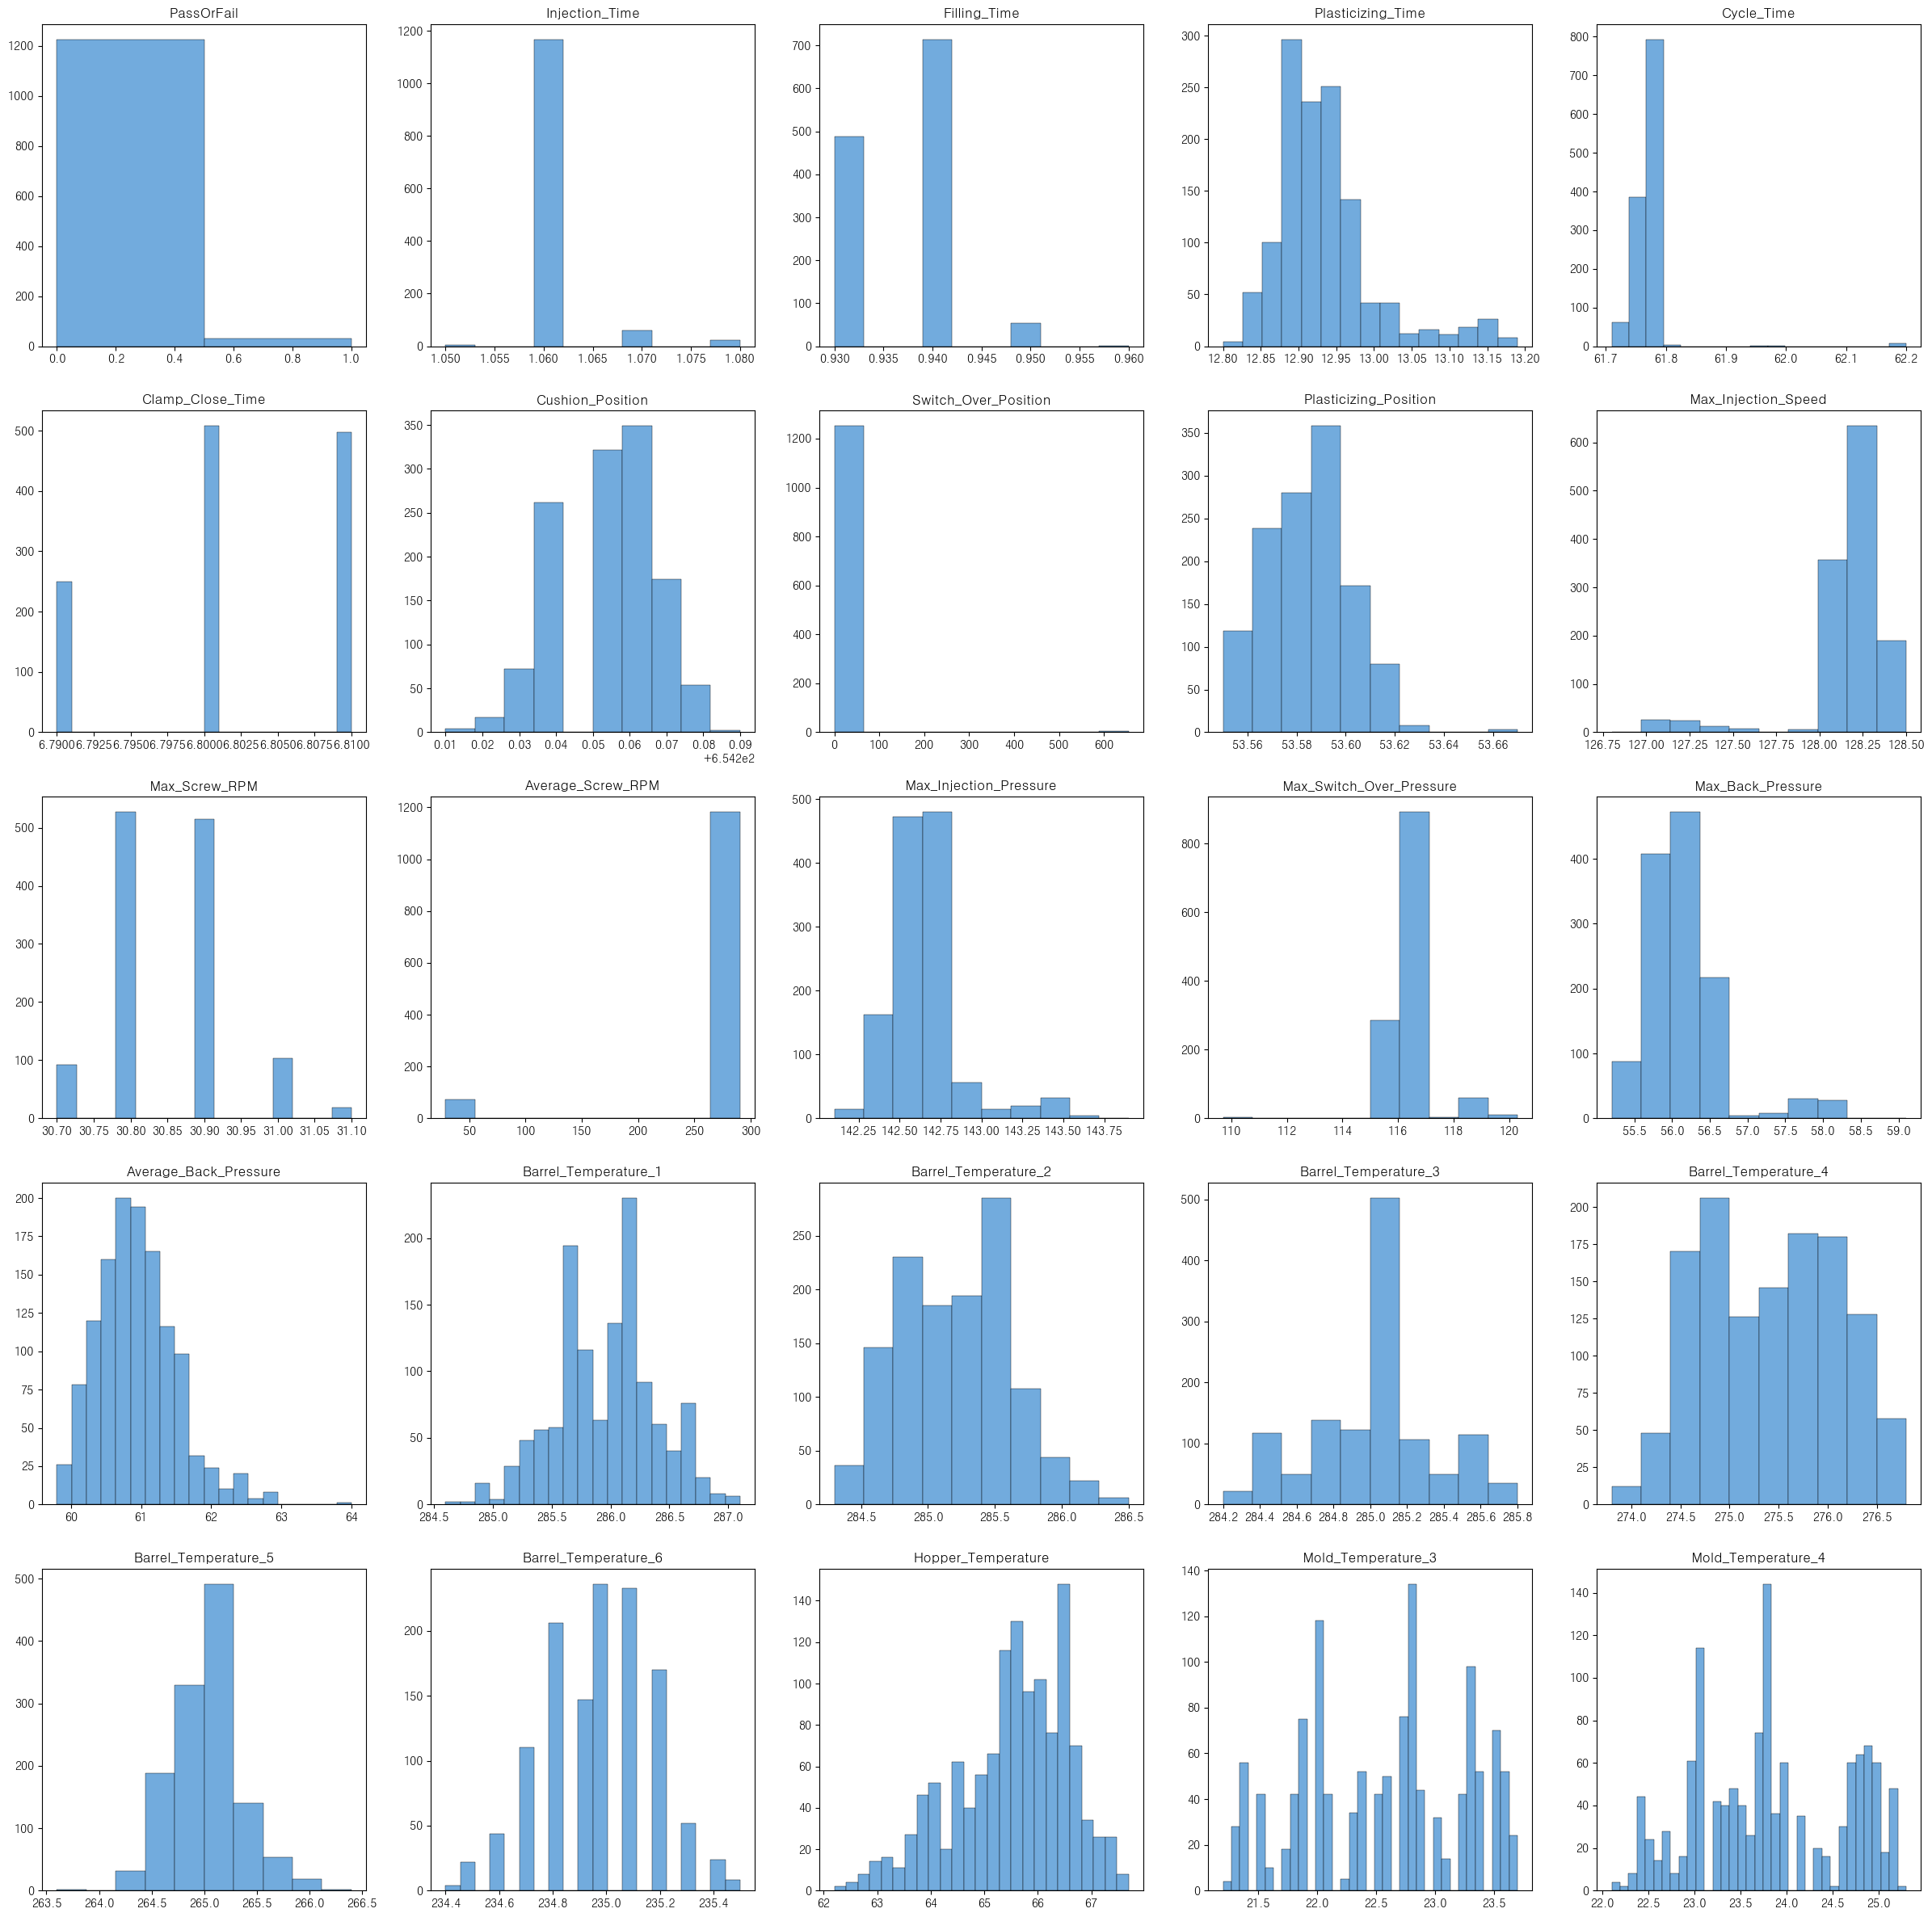

In [8]:
# 변수별 분포도 확인
plt.figure(figsize=(30, 30))

bin = [
    2, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 
    20, 20, 10, 10, 10, 10, 20, 25, 35, 35
]

for index, value in enumerate(rg3):
    sub = plt.subplot(5, 5, index+1)
    sub.hist(
        rg3[value], bins=bin[index], facecolor=(114/255, 171/255, 221/255), 
        linewidth=.3, edgecolor="black"
    )
    plt.title(value)

In [9]:
# 2차 가공 dataframe csv로 저장

rg3.to_csv("data/processed/labeled_data_KAMP_rg3_1.csv", index=False)